In [2]:
from keras_preprocessing.image import ImageDataGenerator

In [3]:
from keras_preprocessing import image

In [4]:
import tensorflow as tf

In [5]:
from tensorflow.keras.optimizers import RMSprop

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [6]:
img = image.load_img("/Users/alexandra/Documents/Python/computer vision/basedata/train/dog/images.jpg")

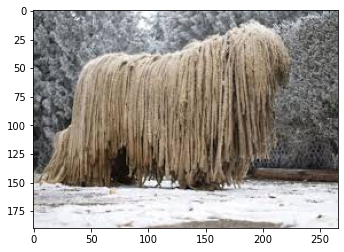

In [7]:
plt.imshow(img)

In [9]:
# 3 dimentional matrix as rgb format 
cv2.imread("/Users/alexandra/Documents/Python/computer vision/basedata/train/dog/images.jpg")

array([[[154, 149, 146],
        [165, 160, 157],
        [108, 103, 100],
        ...,
        [ 58,  55,  50],
        [145, 142, 137],
        [155, 152, 147]],

       [[141, 136, 133],
        [132, 127, 124],
        [157, 152, 149],
        ...,
        [ 99,  96,  91],
        [117, 114, 109],
        [144, 141, 136]],

       [[110, 105, 102],
        [ 83,  78,  75],
        [159, 154, 151],
        ...,
        [154, 154, 148],
        [107, 107, 101],
        [118, 118, 112]],

       ...,

       [[243, 238, 237],
        [243, 238, 237],
        [243, 238, 237],
        ...,
        [250, 246, 245],
        [246, 242, 241],
        [246, 242, 241]],

       [[237, 232, 231],
        [238, 233, 232],
        [238, 233, 232],
        ...,
        [251, 246, 245],
        [248, 243, 242],
        [248, 243, 242]],

       [[232, 227, 226],
        [233, 228, 227],
        [234, 229, 228],
        ...,
        [251, 246, 245],
        [252, 244, 244],
        [252, 244, 244]]

In [10]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [12]:
train_dataset = train.flow_from_directory("basedata/train/", 
                                         target_size = (200, 200),
                                         batch_size = 3,
                                         class_mode = "binary"
                                         )

Found 47 images belonging to 2 classes.


In [18]:
validation_dataset = train.flow_from_directory("basedata/validation/", 
                                         target_size = (200, 200),
                                         batch_size = 3,
                                         class_mode = "binary"
                                         )

Found 10 images belonging to 2 classes.


In [16]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [26]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), 
                                                           activation="relu",
                                                           input_shape =(200,200,3)
                                                          ),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    # +1 layer
                                    tf.keras.layers.Conv2D(32,(3,3), 
                                                           activation="relu",
                                                          ),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    # +1 layer
                                    tf.keras.layers.Conv2D(64,(3,3), 
                                                           activation="relu",
                                                          ),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    ## flattening this out
                                    tf.keras.layers.Flatten(),
                                    ## applying 2 dence layers
                                    tf.keras.layers.Dense(512, activation = "relu"),
                                    ##
                                    tf.keras.layers.Dense(1, activation="sigmoid")
                                    
                                    ])

2022-08-05 13:03:56.644595: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
model.compile(loss = "binary_crossentropy",
             optimizer= RMSprop(lr=0.001),
             metrics= ["accuracy"]
             )

In [31]:
fitted_model = model.fit(train_dataset,
                         steps_per_epoch = 5,
                         epochs = 15,                        
                         validation_data = validation_dataset
                        )

Epoch 1/15
5/5 [==============================] - 1s 123ms/step - loss: 0.1982 - accuracy: 0.9286 - val_loss: 3.1023 - val_accuracy: 0.6000
Epoch 2/15
5/5 [==============================] - 1s 125ms/step - loss: 1.3658 - accuracy: 0.8000 - val_loss: 0.5719 - val_accuracy: 0.8000
Epoch 3/15
5/5 [==============================] - 1s 127ms/step - loss: 0.0747 - accuracy: 1.0000 - val_loss: 0.5953 - val_accuracy: 0.8000
Epoch 4/15
5/5 [==============================] - 1s 119ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 0.4818 - val_accuracy: 0.9000
Epoch 5/15
5/5 [==============================] - 1s 123ms/step - loss: 0.0823 - accuracy: 1.0000 - val_loss: 0.4011 - val_accuracy: 0.9000
Epoch 6/15
5/5 [==============================] - 1s 123ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.4781 - val_accuracy: 0.9000
Epoch 7/15
5/5 [==============================] - 1s 124ms/step - loss: 2.9622 - accuracy: 0.7143 - val_loss: 0.4493 - val_accuracy: 0.8000
Epoch 8/15
5/5 [====

In [42]:
validation_dataset.class_indices

{'dog': 0, 'mop': 1}

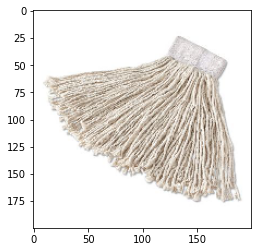

mop


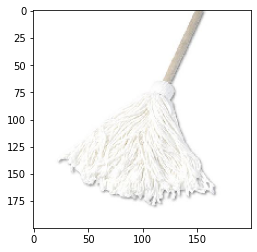

mop


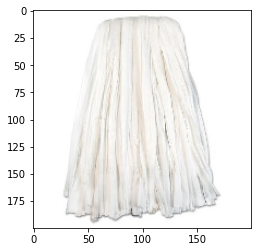

mop


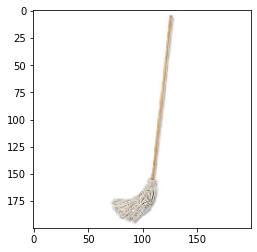

mop


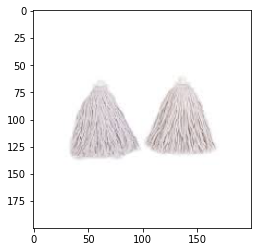

mop


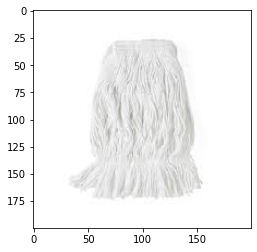

mop


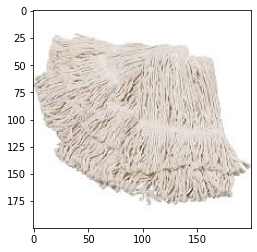

mop


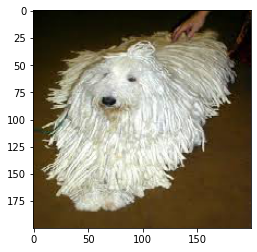

dog


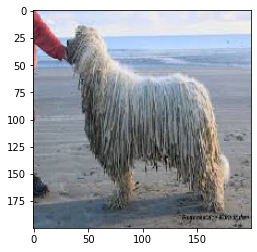

dog


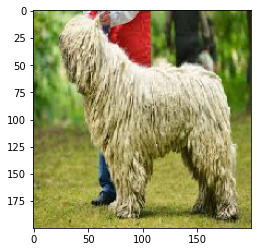

dog


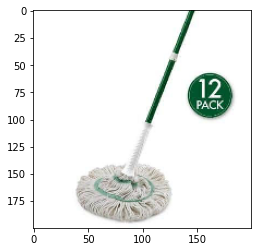

mop


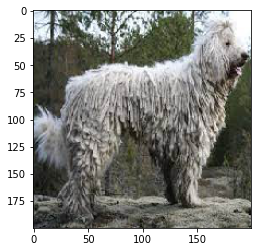

dog


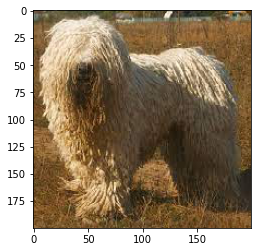

dog


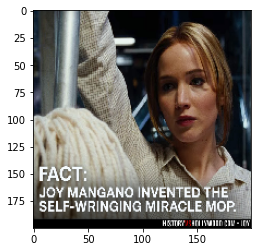

dog


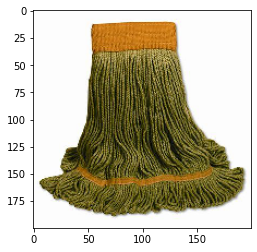

dog


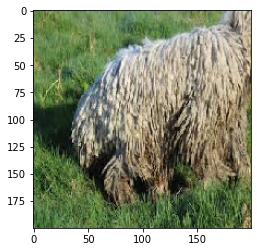

dog


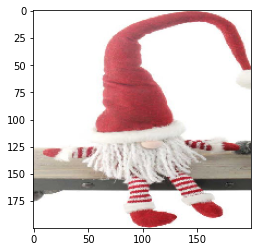

mop


In [45]:
test_path = "basedata/test2"

for i in os.listdir(test_path):
    img = image.load_img(test_path+"//" + i, target_size =(200, 200, 3))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img) 
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("dog")
    else:
        print("mop")
    
    model.predict(images)

Outcome:


Our model works 100% perfectly, according to what we have taught it. Just for fun, I gave it to define 3 funky images, such as Jen Lawrence from a movie Joy (2015) with a hairy mop she invented, a green colored mop and a Christmas gnome with mop beard. All three got wrongly classified, and that's quite adequate for the model, which was trained only on white mops + never seen a human and a gnome during the training process. 